In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df_train = pd.read_csv('/content/train_users_2.csv')
df_test = pd.read_csv('/content/test_users.csv')
sessions = pd.read_csv('/content/sessions.csv')
age_gender= pd.read_csv('/content/age_gender_bkts.csv')
countries = pd.read_csv('/content/countries.csv')

In [ ]:

print('the columns name of training dataset:\n',df_train.columns)
print('the columns name of test dataset:\n',df_test.columns)

the columns name of training dataset:
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')
the columns name of test dataset:
 Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')


In [ ]:
#how many users in the train set
df_train.shape


(213451, 16)

In [ ]:
#how many in test set

df_test.shape


(62096, 15)

**Handle missing values for better visualization **

In [ ]:
# Check missing values in the training set
print("Missing values in training set:")
print(df_train.isnull().sum())

# Check missing values in the test set
print("\nMissing values in test set:")
print(df_test.isnull().sum())


Missing values in training set:
id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

Missing values in test set:
id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tra

In [ ]:
print(df_train['date_first_booking'].isnull().sum(), "missing values in train set")
print(df_test['date_first_booking'].isnull().sum(), "missing values in test set")


124543 missing values in train set
62096 missing values in test set


In [ ]:
df_train.drop(columns=['date_first_booking'], inplace=True)
df_test.drop(columns=['date_first_booking'], inplace=True)


In [ ]:
print(df_train['age'].isnull().sum(), "missing values in train set")
print(df_test['age'].isnull().sum(), "missing values in test set")


87990 missing values in train set
28876 missing values in test set


In [ ]:
#to make sure the age is a number
df_train['age'] = pd.to_numeric(df_train['age'], errors='coerce')
df_test['age'] = pd.to_numeric(df_test['age'], errors='coerce')


In [ ]:
#to make sure unkown counted as Nan
df_train.loc[df_train['age'] == 'unknown', 'age'] = np.nan
df_test.loc[df_test['age'] == 'unknown', 'age'] = np.nan


In [ ]:
print(df_train['age'].describe())
print(df_test['age'].describe())


count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64
count    33220.000000
mean        37.616677
std         74.440647
min          1.000000
25%         26.000000
50%         31.000000
75%         40.000000
max       2002.000000
Name: age, dtype: float64


In [ ]:
print(df_train['age'].isnull().sum(), "missing values in train set")
print(df_test['age'].isnull().sum(), "missing values in test set")


87990 missing values in train set
28876 missing values in test set


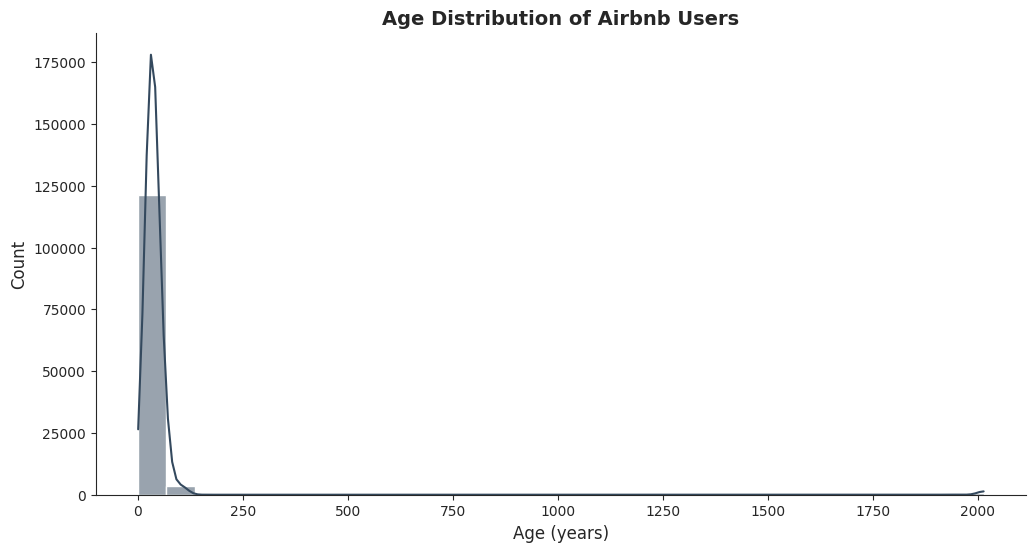

In [ ]:



sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(df_train['age'].dropna(), bins=30, kde=True, color='#34495E', ax=ax)

plt.title("Age Distribution of Airbnb Users", fontsize=14, fontweight='bold')
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Remove unnecessary spines
sns.despine()

# Show plot
plt.show()


 1.Some age values are incorrect,close to 2000
 Cleaning such data

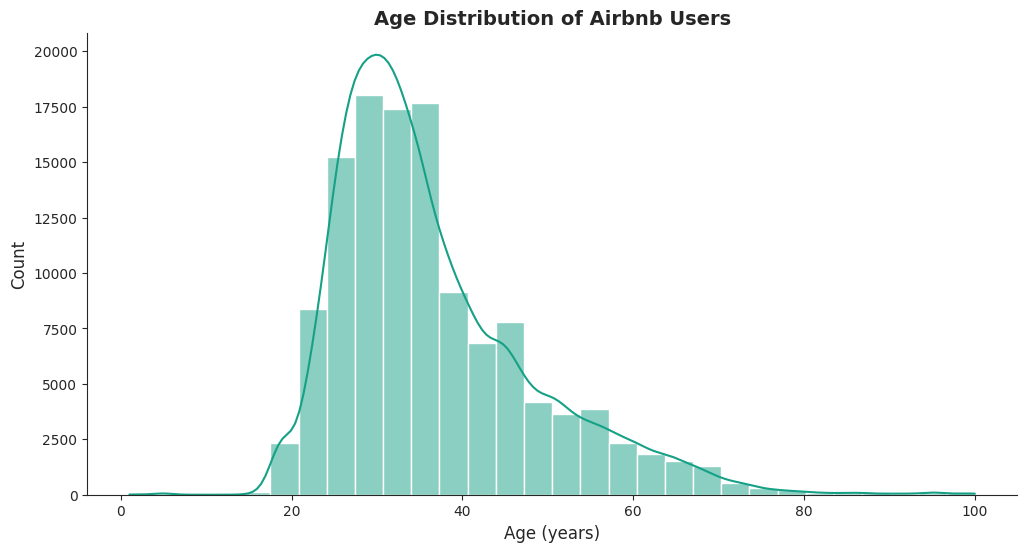

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style('ticks')

# Remove unrealistic ages (instead of forcing to 36)
df_train['age'] = df_train['age'].apply(lambda x: np.nan if x > 100 else x)

# Create figure and axis
fig1 ,ax= plt.subplots(figsize=(12, 6))

# Plot histogram with KDE
sns.histplot(df_train['age'].dropna(), bins=30, kde=True, color='#16A085', ax=ax)

# Labels and title
plt.title("Age Distribution of Airbnb Users", fontsize=14, fontweight='bold')
plt.xlabel("Age (years)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Remove unnecessary spines
sns.despine()

# Show plot
plt.show()


1 .Majority of the users are between age 25 and 40 years .
2 .There are some age values which are less than 18 years(not allowed)

In [ ]:
# Replacing invalid age with NaN in test and train
df_train.loc[df_train['age'] > 95, 'age'] = np.nan
df_train.loc[df_train['age'] < 16, 'age'] = np.nan
df_test.loc[df_test['age'] > 95, 'age'] = np.nan
df_test.loc[df_test['age'] < 16, 'age'] = np.nan

In [ ]:
# Replace missing age with median
print (df_train.age.median())
print (df_test.age.median())
df_train.loc[df_train['age'].isnull(), 'age' ] = df_train.age.median()
df_test.loc[df_test['age'].isnull(), 'age' ] = df_test.age.median()

34.0
31.0


In [ ]:
print(df_train['age'].isnull().sum(), "missing values in train set")
print(df_test['age'].isnull().sum(), "missing values in test set")


0 missing values in train set
0 missing values in test set


Gender
make it Unkown in both files for consistency
visualize the gender distrubution

In [ ]:
print(df_train['gender'].unique())
print(df_test['gender'].unique())


['-unknown-' 'MALE' 'FEMALE' 'OTHER']
['FEMALE' '-unknown-' 'MALE' 'OTHER']


In [ ]:
print(df_train['gender'].isnull().sum(), "missing values in train set")
print(df_test['gender'].isnull().sum(), "missing values in test set")

0 missing values in train set
0 missing values in test set


In [ ]:
df_train['gender'] = df_train['gender'].replace('-unknown-', 'Unknown')
df_train.head()


,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,Unknown,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,Unknown,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
df_test['gender'] = df_test['gender'].replace('-unknown-', 'Unknown')

df_test.head()


,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,Unknown,31.0,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,Unknown,31.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,Unknown,31.0,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,Unknown,31.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


<ipython-input-843-f5a348b2117e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_train, palette="coolwarm")


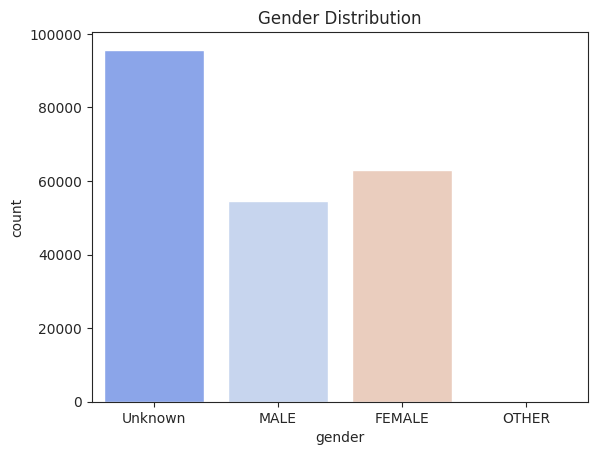

In [ ]:
sns.countplot(x='gender', data=df_train, palette="coolwarm")
plt.title("Gender Distribution")
plt.show()


<ipython-input-844-79fc7e32bf71>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_test, palette="coolwarm")


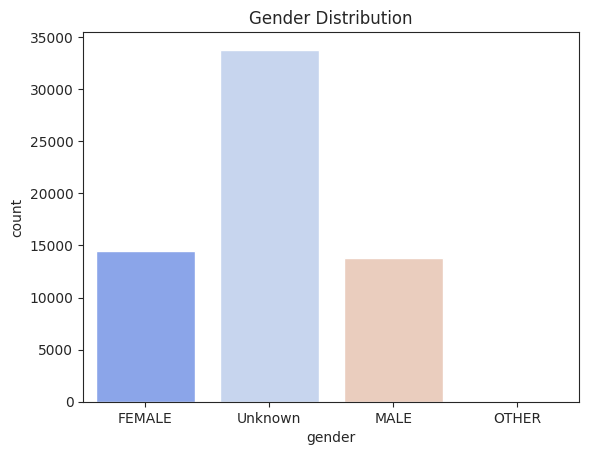

In [ ]:
sns.countplot(x='gender', data=df_test, palette="coolwarm")
plt.title("Gender Distribution")
plt.show()

Users whose gender is unknown form the majority.
Users whose gender is known, there are more females than males.

In [ ]:
print(df_train['first_affiliate_tracked'].unique())
print(df_test['first_affiliate_tracked'].unique())


['untracked' 'omg' nan 'linked' 'tracked-other' 'product' 'marketing'
 'local ops']
['untracked' 'linked' 'omg' 'product' 'marketing' 'tracked-other' nan
 'local ops']


In [ ]:
print(df_train['first_affiliate_tracked'].value_counts(dropna=False))
print(df_test['first_affiliate_tracked'].value_counts(dropna=False))



first_affiliate_tracked
untracked        109232
linked            46287
omg               43982
tracked-other      6156
NaN                6065
product            1556
marketing           139
local ops            34
Name: count, dtype: int64
first_affiliate_tracked
untracked        33949
linked           15777
omg              10877
product            797
tracked-other      499
marketing          142
local ops           35
NaN                 20
Name: count, dtype: int64


Group product , marketing , local ops as they're rare into one group call it Other or tracked
fill Nan with unkown values or mode value which is untracked


In [ ]:
def clean_affiliate_tracked(df):
    df['first_affiliate_tracked'].fillna('untracked', inplace=True)
    df['first_affiliate_tracked'] = df['first_affiliate_tracked'].apply(
        lambda x: 'Tracked' if x not in ['untracked', 'linked', 'omg'] else x
    )
    return df

In [ ]:
df_train = clean_affiliate_tracked(df_train)
df_test = clean_affiliate_tracked(df_test)

<ipython-input-847-c94cefd3ab1a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['first_affiliate_tracked'].fillna('untracked', inplace=True)


In [ ]:
print(df_train['first_affiliate_tracked'].value_counts())
print(df_test['first_affiliate_tracked'].value_counts())

first_affiliate_tracked
untracked    115297
linked        46287
omg           43982
Tracked        7885
Name: count, dtype: int64
first_affiliate_tracked
untracked    33969
linked       15777
omg          10877
Tracked       1473
Name: count, dtype: int64


In [ ]:
print(df_train['first_affiliate_tracked'].isnull().sum(), "missing values in train set")
print(df_test['first_affiliate_tracked'].isnull().sum(), "missing values in test set")

0 missing values in train set
0 missing values in test set


**Exploratory Data Analysis**

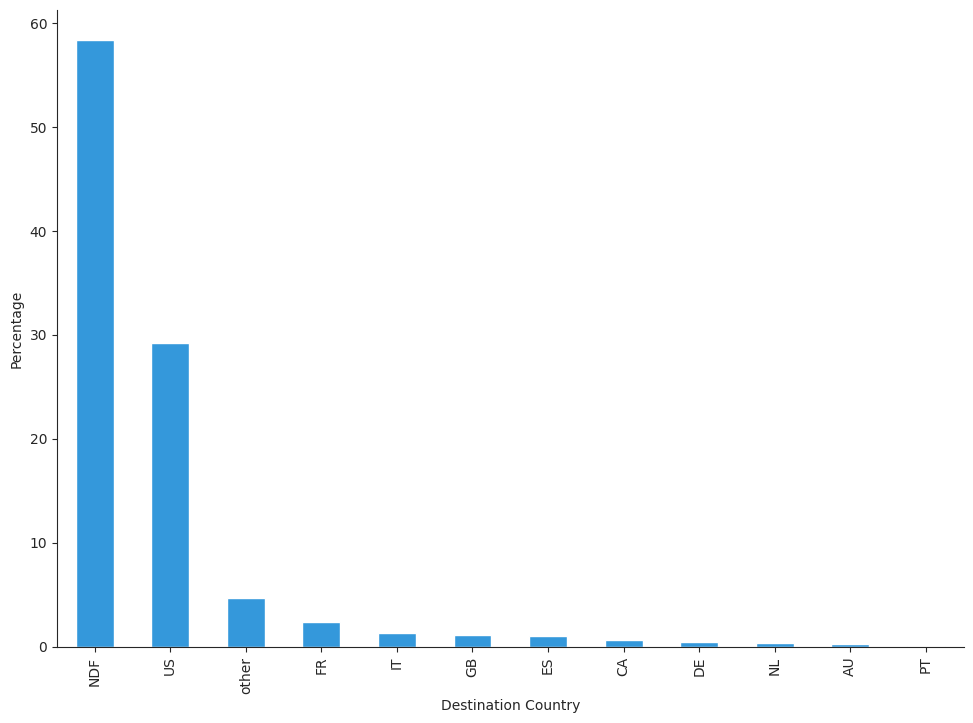

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = df_train.country_destination.value_counts() / df_train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

1.As can be seen above, close to 60% of users have never booked an Airbnb

2.29 % of users travelled in their home country i.e. U.S

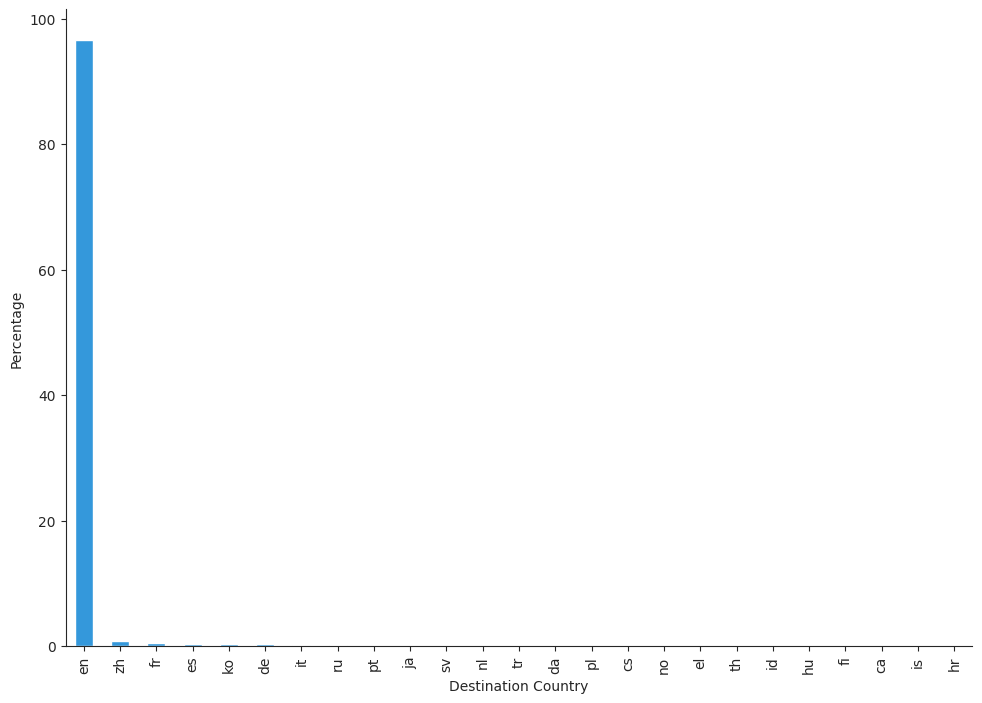

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
destination_percentage = df_train.language.value_counts() / df_train.shape[0] * 100
destination_percentage.plot(kind='bar',color='#3498DB')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
sns.despine()

1.Majority of the user's language preference destination country is English.
2. Predicting geo location of users based on language preference may be useful .

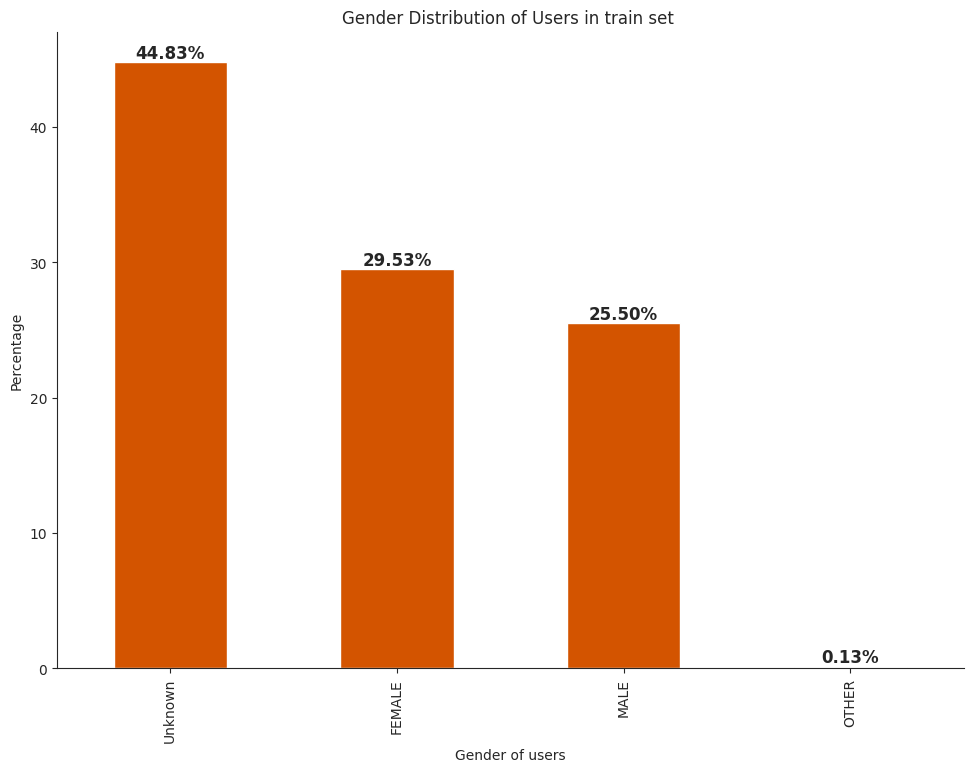

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

# Calculate percentage
gender_percentage = df_train.gender.value_counts() / df_train.shape[0] * 100

# Plot bar chart
bars = gender_percentage.plot(kind='bar', color='#D35400', ax=ax)

# Annotate each bar with its percentage value
for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,  # X-coordinate (center of bar)
        height,  # Y-coordinate (top of bar)
        f'{height:.2f}%',  # Label text (percentage)
        ha='center',  # Center align
        va='bottom',  # Place above bar
        fontsize=12,
        fontweight='bold'
    )

# Labels and styling
plt.xlabel('Gender of users')
plt.ylabel('Percentage')
plt.title('Gender Distribution of Users in train set ')
sns.despine()

plt.show()


the majority in training set is female

> Add blockquote



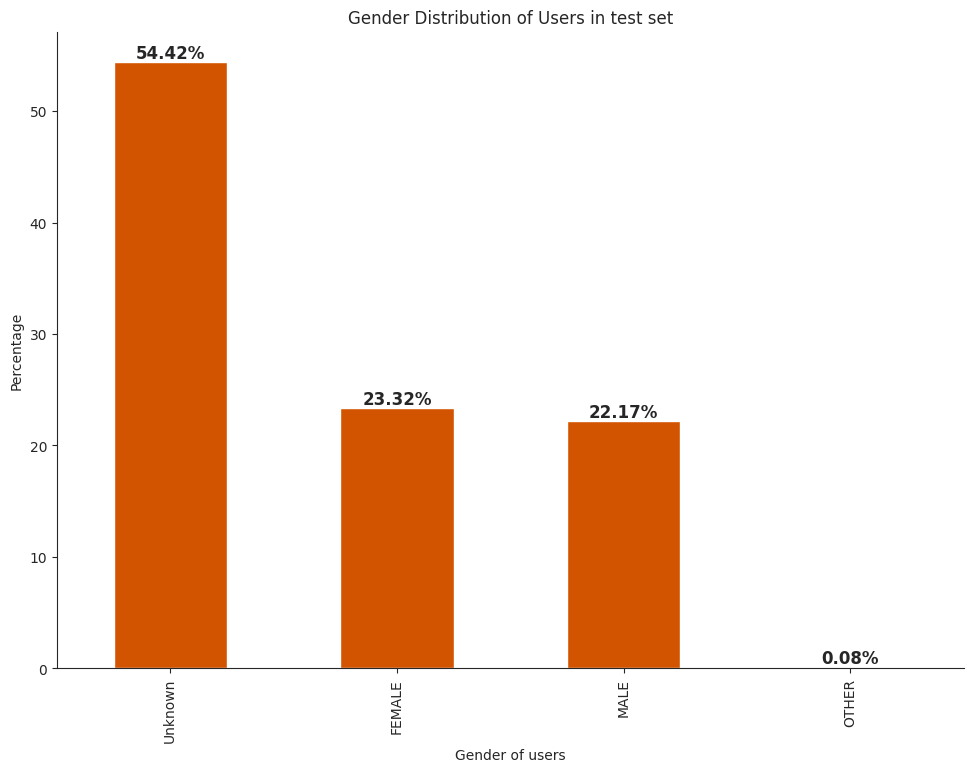

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

# Calculate percentage
gender_percentage = df_test.gender.value_counts() / df_test.shape[0] * 100

# Plot bar chart
bars = gender_percentage.plot(kind='bar', color='#D35400', ax=ax)

# Annotate each bar with its percentage value
for bar in bars.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,  # X-coordinate (center of bar)
        height,  # Y-coordinate (top of bar)
        f'{height:.2f}%',  # Label text (percentage)
        ha='center',  # Center align
        va='bottom',  # Place above bar
        fontsize=12,
        fontweight='bold'
    )

# Labels and styling
plt.xlabel('Gender of users')
plt.ylabel('Percentage')
plt.title('Gender Distribution of Users in test set')
sns.despine()

plt.show()

54 % of user's gender information is not present
There is less difference between Female [23%] and Male [22%] users

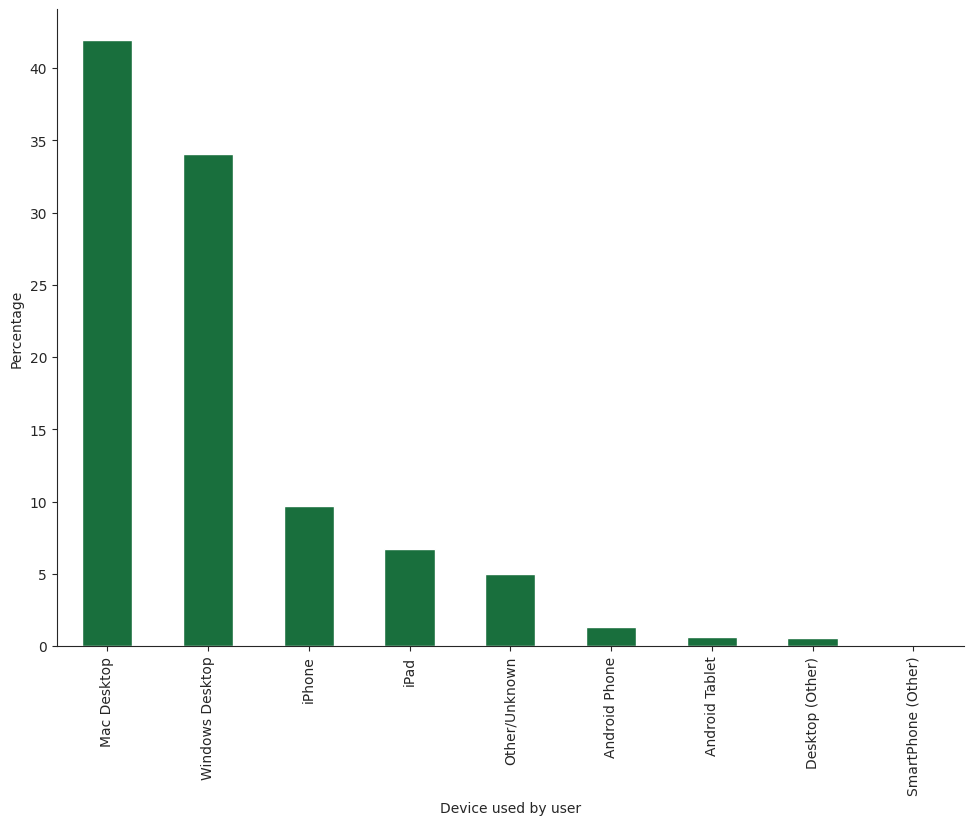

In [ ]:
#Exploring the usage of different devices of viewing Airbnb site
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
device_percentage = df_train.first_device_type.value_counts() / df_train.shape[0] * 100
device_percentage.plot(kind='bar',color='#196F3D')
plt.xlabel('Device used by user')
plt.ylabel('Percentage')
sns.despine()

In [ ]:
# Percentage of users using Apple products
apple_users_percentage = (df_train.first_device_type.str.contains('Mac|iPhone|iPad', na=False).sum() / df_train.shape[0]) * 100
print(f"{apple_users_percentage:.2f}% users are using Apple products")


58.42% users are using Apple products


In [ ]:
# Count of users who booked at least once (NDF = No Destination Found → Filter those out)
booked_users = df_train[df_train['country_destination'] != 'NDF']

# Count of Apple users who booked at least once
apple_booked_users = booked_users[booked_users.first_device_type.str.contains('Mac|iPhone|iPad', na=False)]

# Total number of users who booked
total_booked_users = booked_users.shape[0]

# Percentage of Apple users among booked users
apple_booking_percentage = (apple_booked_users.shape[0] / total_booked_users) * 100

print(f"Out of {total_booked_users} users who travelled at least once, {apple_booked_users.shape[0]} users are Apple users [{apple_booking_percentage:.2f}%]")


Out of 88908 users who travelled at least once, 54131 users are Apple users [60.88%]


 1.Apple Users are a Majority on the Platform
 2.Apple Users Are More Likely to Travel:
Among  88908  users who made at least one booking,
60.88 used Apple devices.
Since Apple users tend to book more, it might be beneficial to optimize ads, promotions, and the user experience specifically for Apple devices.
Understanding why Apple users book more frequently could provide further insights (e.g., do they have higher spending capacity or better engagement?).





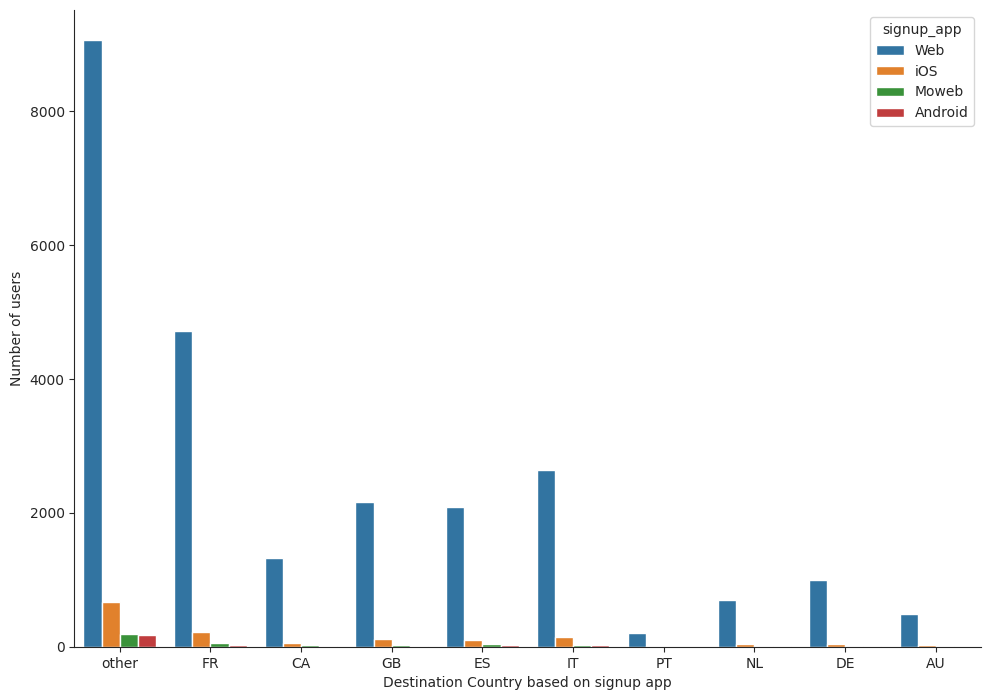

In [ ]:
#Exploring the device users are using when signing up to Airbnb
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
data_without_NDF = df_train[df_train['country_destination']!='US']
data_without_NDF1= data_without_NDF[data_without_NDF['country_destination']!='NDF']
sns.countplot(x='country_destination', hue='signup_app',data=data_without_NDF1)
plt.xlabel('Destination Country based on signup app')
plt.ylabel('Number of users')
sns.despine()

1.Users with signup app 'Web' more than signup app ( Moweb , iOS , Android) in every country.
2.Android is the least used signup app


<ipython-input-859-e5b2421b9205>:10: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.countplot(x='country_destination', hue='signup_method', data=data_without_NDF1, palette=palette)


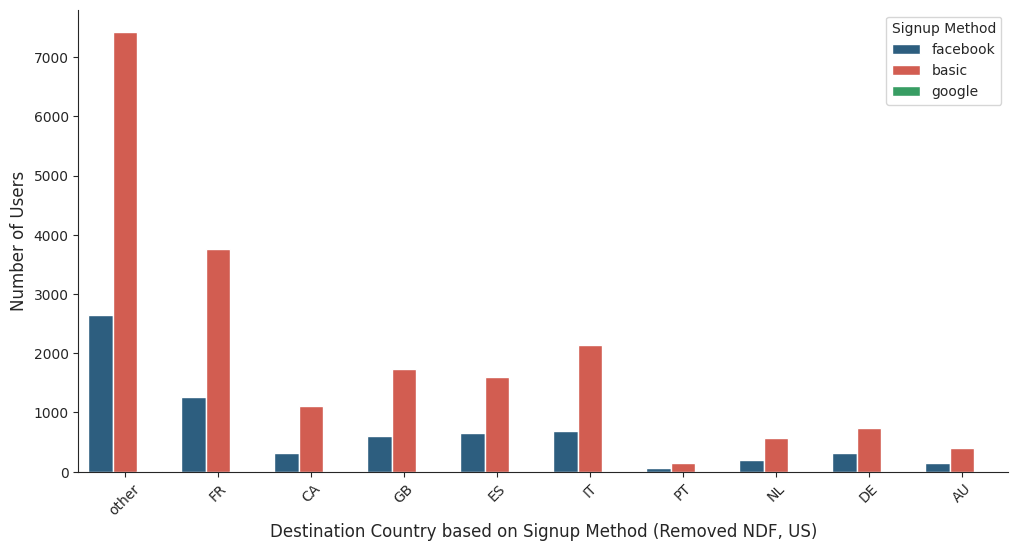

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(12, 6))  # Adjusted figure size

data_without_NDF = df_train[df_train['country_destination'] != 'US']
data_without_NDF1 = data_without_NDF[data_without_NDF['country_destination'] != 'NDF']

# Use a color palette for better differentiation
palette = ["#1F618D", "#E74C3C", "#27AE60", "#FFA07A"]

sns.countplot(x='country_destination', hue='signup_method', data=data_without_NDF1, palette=palette)

plt.xlabel('Destination Country based on Signup Method (Removed NDF, US)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.legend(title="Signup Method")  # Add a title to the legend

sns.despine()
plt.show()


There are less signups (almost negligible) happening by google signup compared to facebook,basic signup.
Basic signup count is almost double facebook signup count

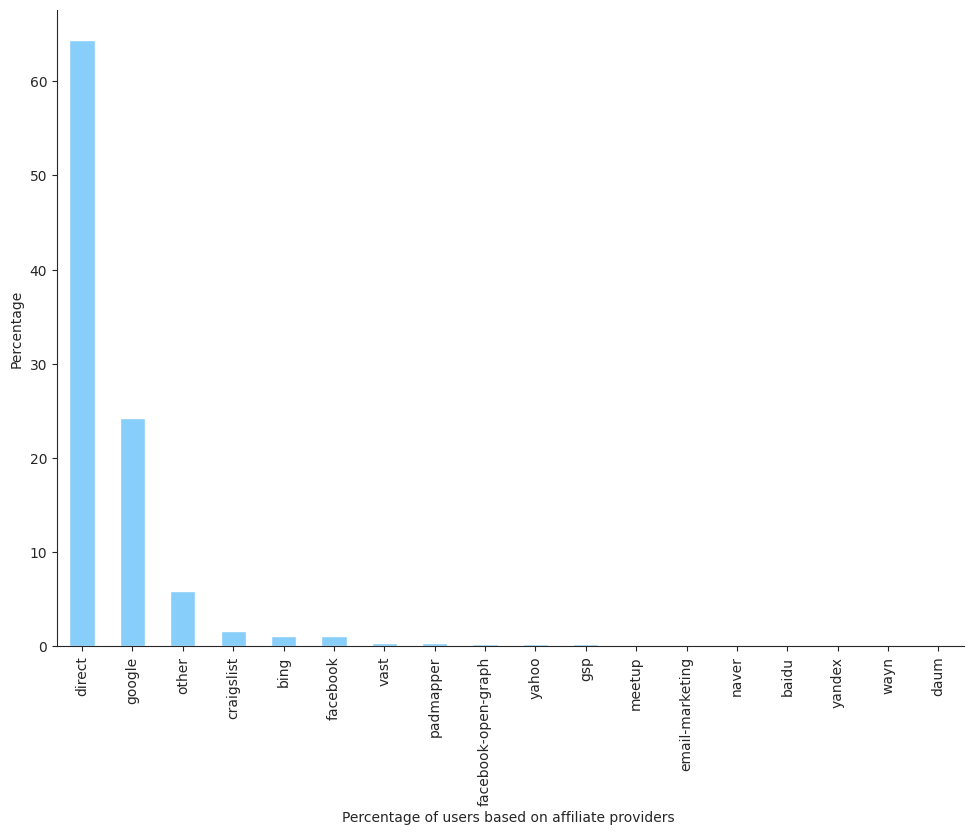

In [ ]:
#Exploring the affiliate provider users are using when signing up to Airbnb
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
affiliate_provider_percentage = df_train.affiliate_provider.value_counts() / df_train.shape[0] * 100
affiliate_provider_percentage.plot(kind='bar',color="#87CEFA")
plt.xlabel('Percentage of users based on affiliate providers ')
plt.ylabel('Percentage')
sns.despine()

1.In previous plot we have observed that percentage of users signing up with google is neglible amount, but in this plot we observe that most of users are coming from google (more than 20%)

**Sessions cleaning and visualization**

In [ ]:
sessions.replace('-unknown-', np.nan, inplace=True)

In [ ]:
median_secs = sessions['secs_elapsed'].median()
sessions['secs_elapsed'] = sessions['secs_elapsed'].fillna(median_secs)

In [ ]:
print(sessions['secs_elapsed'].describe())

count    4.530476e+06
mean     2.046380e+04
std      9.254003e+04
min      0.000000e+00
25%      2.790000e+02
50%      1.175000e+03
75%      8.429000e+03
max      1.799977e+06
Name: secs_elapsed, dtype: float64


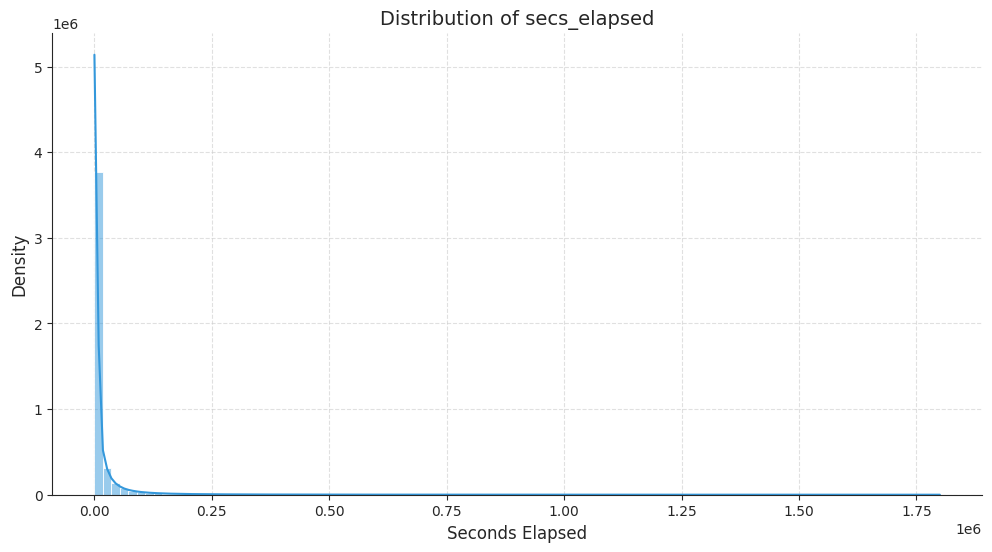

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.histplot(sessions['secs_elapsed'].dropna(), bins=100, kde=True, color="#3498db")  # Use KDE for smooth density

plt.xlabel('Seconds Elapsed', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of secs_elapsed', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for readability

sns.despine()  # Remove top & right spines for a clean look
plt.show()

In [ ]:
print(sessions['device_type'].value_counts())

device_type
Mac Desktop                         1798499
Windows Desktop                     1308317
iPhone                               587847
iPad Tablet                          308397
Android App Unknown Phone/Tablet     265240
Android Phone                        123683
Tablet                                39873
Linux Desktop                         14933
Chromebook                            10602
iPodtouch                              3865
Blackberry                              209
Windows Phone                           177
Opera Phone                               5
Name: count, dtype: int64


In [ ]:
# Count missing device type values
missing_device_count = sessions['device_type'].isnull().sum()
print(f"Missing 'device_type' values: {missing_device_count}")

Missing 'device_type' values: 68829


In [ ]:
print(sessions.isna().sum())  # Quick check for missing values


user_id           14663
action            43890
action_type      991887
action_detail    991887
device_type       68829
secs_elapsed          0
dtype: int64


In [ ]:
# Aggregate session data per user
session_features = sessions.groupby('user_id').agg(
    total_sessions=('user_id', 'count'),
    total_secs=('secs_elapsed', 'sum'),
    avg_secs=('secs_elapsed', 'mean'),
    unique_actions=('action', 'nunique'),
    unique_action_types=('action_type', 'nunique'),
    unique_action_details=('action_detail', 'nunique'),
    unique_devices=('device_type', 'nunique'),
    most_frequent_device=('device_type', lambda x: x.mode()[0] if not x.isnull().all() else np.nan),
    most_common_action=('action', lambda x: x.mode()[0] if not x.isnull().all() else np.nan)
).reset_index()


In [ ]:
 #Handle Missing Values in Action Columns (action, action_type, action_detail)
sessions.fillna('unknown', inplace=True)

In [ ]:
#Encode Categorical Variables (device_type, action, etc.)
encoder = LabelEncoder()
sessions['device_type_encoded'] = encoder.fit_transform(sessions['device_type'].astype(str))


In [ ]:
action_counts = sessions['action'].value_counts(normalize=True)
sessions['action_encoded'] = sessions['action'].map(action_counts)

action_type_counts = sessions['action_type'].value_counts(normalize=True)
sessions['action_type_encoded'] = sessions['action_type'].map(action_type_counts)


In [ ]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4530476 entries, 0 to 4530475
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   user_id              object 
 1   action               object 
 2   action_type          object 
 3   action_detail        object 
 4   device_type          object 
 5   secs_elapsed         float64
 6   device_type_encoded  int64  
 7   action_encoded       float64
 8   action_type_encoded  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 311.1+ MB


In [ ]:
sessions.isna().sum()

,0
user_id,0
action,0
action_type,0
action_detail,0
device_type,0
secs_elapsed,0
device_type_encoded,0
action_encoded,0
action_type_encoded,0


In [ ]:
print(df_train.columns)
print(df_test.columns)
print(session_features.columns)


Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination'],
      dtype='object')
Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'],
      dtype='object')
Index(['user_id', 'total_sessions', 'total_secs', 'avg_secs', 'unique_actions',
       'unique_action_types', 'unique_action_details', 'unique_devices',
       'most_frequent_device', 'most_common_action'],
      dtype='object')


In [ ]:
session_features.rename(columns={'user_id': 'id'}, inplace=True)



In [ ]:
print(session_features['id'].duplicated().sum())  # Should be 0


0


In [ ]:
print(df_train.columns)
print(df_test.columns)
print(session_features.columns)


Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination'],
      dtype='object')
Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'],
      dtype='object')
Index(['id', 'total_sessions', 'total_secs', 'avg_secs', 'unique_actions',
       'unique_action_types', 'unique_action_details', 'unique_devices',
       'most_frequent_device', 'most_common_action'],
      dtype='object')


In [ ]:
sessions.drop(columns=['action', 'action_type', 'action_detail', 'device_type'], inplace=True)


In [ ]:
print(session_features.columns)

Index(['id', 'total_sessions', 'total_secs', 'avg_secs', 'unique_actions',
       'unique_action_types', 'unique_action_details', 'unique_devices',
       'most_frequent_device', 'most_common_action'],
      dtype='object')


In [ ]:
df_train = df_train.merge(session_features, on='id', how='left')
df_test = df_test.merge(session_features, on='id', how='left')


In [ ]:
df_train['country_destination']

,country_destination
0,NDF
1,NDF
2,US
3,other
4,US
...,...
213446,NDF
213447,NDF
213448,NDF
213449,NDF


In [ ]:
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)


<ipython-input-882-a28ee2c74769>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test.fillna(0, inplace=True)


In [ ]:
df_test.isna().sum()

,0
id,0
date_account_created,0
timestamp_first_active,0
gender,0
age,0
signup_method,0
signup_flow,0
language,0
affiliate_channel,0
affiliate_provider,0


In [ ]:
def extract_date_features(df, is_train=True, reference_date=None):


    # Convert to datetime format
    df['date_account_created_new'] = pd.to_datetime(df['date_account_created'])
    df['date_first_active_new'] = pd.to_datetime((df['timestamp_first_active'] // 1000000), format='%Y%m%d')

    # Extracting Features
    df['date_account_created_day'] = df['date_account_created_new'].dt.day_name()
    df['date_account_created_month'] = df['date_account_created_new'].dt.month
    df['date_account_created_year'] = df['date_account_created_new'].dt.year

    # Reference date for "days_since_creation"
    if is_train:
        reference_date = df['date_account_created_new'].min()

    df['days_since_creation'] = (df['date_account_created_new'] - reference_date).dt.days

    # Return reference_date only for train set
    return (df, reference_date) if is_train else df


In [ ]:
df_train, reference_date = extract_date_features(df_train, is_train=True)


In [ ]:
df_test = extract_date_features(df_test, is_train=False, reference_date=reference_date)


Extracting time-based features from the 'date_account_created' column  
'account_created_day': Captures the exact day of the month (1-31)  
'account_created_weekday': Captures the day of the week (Monday-Sunday)  
These features help analyze booking trends based on specific days or weekdays.  


<ipython-input-887-d9cf0853ce14>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


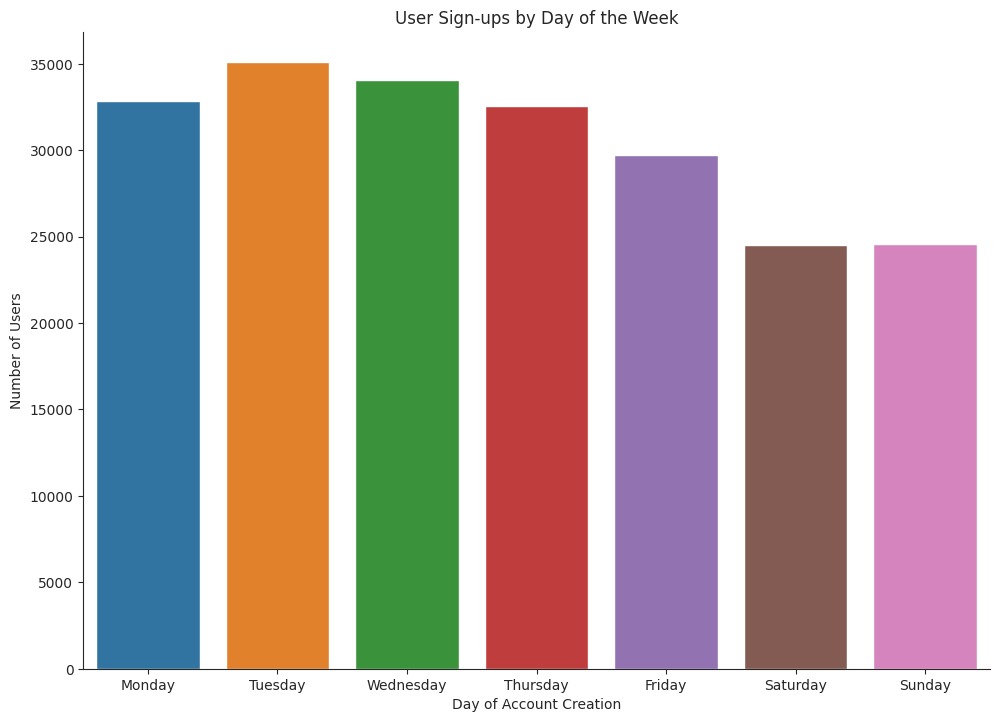

In [ ]:

# Define colors for Monday-Friday (Weekdays) and Saturday-Sunday (Weekend)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_colors = ["#1F77B4", "#FF7F0E", "#2CA02C", "#D62728", "#9467BD", "#8C564B", "#E377C2"]  # Colors for each day

# Plot
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(11.7, 8.27))

sns.countplot(
    x='date_account_created_day',
    data=df_train,
    order=day_order,  # Ensure the order is Monday-Sunday
    palette=day_colors  # Apply color mapping
)

plt.xlabel('Day of Account Creation')
plt.ylabel('Number of Users')
plt.title('User Sign-ups by Day of the Week')
sns.despine()
plt.show()


User activity is low on saturday and sunday, bookings on Saturday and Sunday is lower than the others during the week

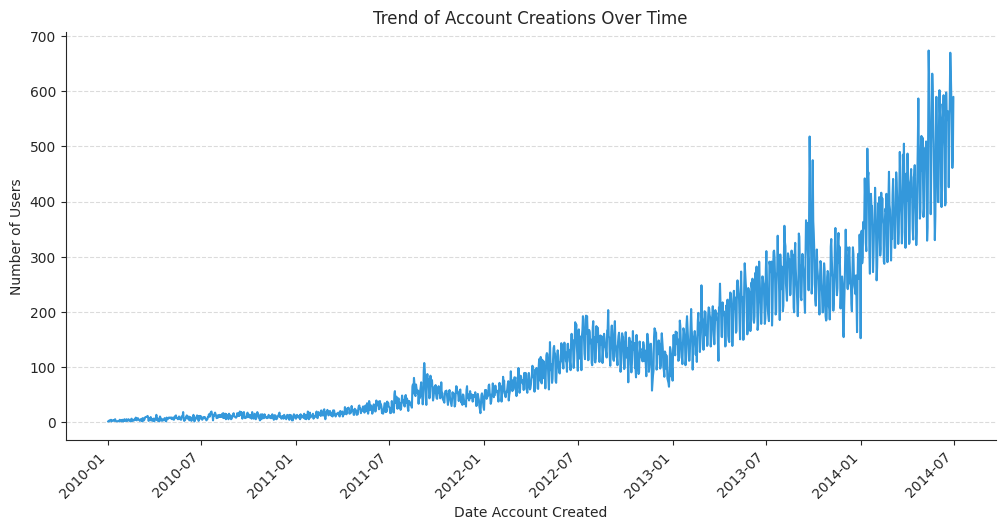

In [ ]:
#checking user activity over months, checking trend account creations over time
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(12, 6))

#sort it by date
df_train.date_account_created_new.value_counts().sort_index().plot(kind='line', linewidth=1.5, color="#3498DB")

plt.xlabel('Date Account Created')
plt.ylabel('Number of Users')
plt.title('Trend of Account Creations Over Time')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()


1.Every year beween September and October there is increase in Activity of users on Airbnb .
1.Basic study on this lead to interesting phenomena that users are trying to book for Superbowl , Labor day.

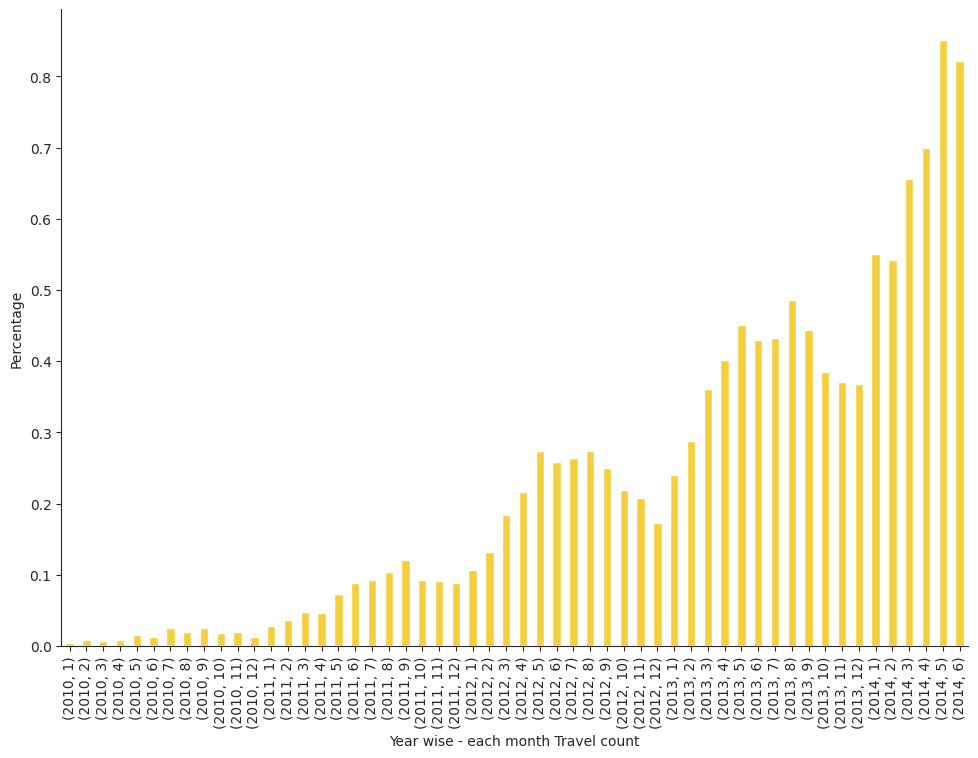

In [ ]:
# Checking the booking during months in years
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

# Filter out 'NDF' and 'US'
data_without_NDF = df_train[(df_train['country_destination'] != 'US') &
                            (df_train['country_destination'] != 'NDF')]

# Compute booking percentage directly
destination_percentage = (
    data_without_NDF.groupby(['date_account_created_year', 'date_account_created_month'])
    .size() / df_train.shape[0] * 100
)

# Plot the data
destination_percentage.plot(kind='bar', color="#F4D03F")
plt.xlabel('Year wise - each month Travel count')
plt.ylabel('Percentage')
sns.despine()
plt.show()



1 . Every year it is following almost same trend like in 7,8,9 months the chance of booking is high .

In [ ]:
print(df_test.columns)

Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'total_sessions', 'total_secs',
       'avg_secs', 'unique_actions', 'unique_action_types',
       'unique_action_details', 'unique_devices', 'most_frequent_device',
       'most_common_action', 'date_account_created_new',
       'date_first_active_new', 'date_account_created_day',
       'date_account_created_month', 'date_account_created_year',
       'days_since_creation'],
      dtype='object')


In [ ]:
print(df_train.columns)

Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination',
       'total_sessions', 'total_secs', 'avg_secs', 'unique_actions',
       'unique_action_types', 'unique_action_details', 'unique_devices',
       'most_frequent_device', 'most_common_action',
       'date_account_created_new', 'date_first_active_new',
       'date_account_created_day', 'date_account_created_month',
       'date_account_created_year', 'days_since_creation'],
      dtype='object')


In [ ]:
df_train.shape

(213451, 30)

In [ ]:
df_test.shape

(62096, 29)

In [ ]:
print(df_test.columns)

Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'total_sessions', 'total_secs',
       'avg_secs', 'unique_actions', 'unique_action_types',
       'unique_action_details', 'unique_devices', 'most_frequent_device',
       'most_common_action', 'date_account_created_new',
       'date_first_active_new', 'date_account_created_day',
       'date_account_created_month', 'date_account_created_year',
       'days_since_creation'],
      dtype='object')


In [ ]:
print(df_train.columns)


Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination',
       'total_sessions', 'total_secs', 'avg_secs', 'unique_actions',
       'unique_action_types', 'unique_action_details', 'unique_devices',
       'most_frequent_device', 'most_common_action',
       'date_account_created_new', 'date_first_active_new',
       'date_account_created_day', 'date_account_created_month',
       'date_account_created_year', 'days_since_creation'],
      dtype='object')


In [ ]:
#Encoding for the training and test set before using the model

In [ ]:
categorical_cols = df_train.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['id', 'date_account_created', 'gender', 'signup_method', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination', 'most_frequent_device', 'most_common_action',
       'date_account_created_day'],
      dtype='object')


In [ ]:
df_train.replace('-unknown-', 'Unknown', inplace=True)
df_test.replace('-unknown-', 'Unknown', inplace=True)

df_train.replace('unknown', 'Unknown', inplace=True)
df_test.replace('unknown', 'Unknown', inplace=True)


In [ ]:
print(df_train.isin(['-unknown-']).sum())  # Check train set
print(df_test.isin(['-unknown-']).sum())   # Check test set


id                            0
date_account_created          0
timestamp_first_active        0
gender                        0
age                           0
signup_method                 0
signup_flow                   0
language                      0
affiliate_channel             0
affiliate_provider            0
first_affiliate_tracked       0
signup_app                    0
first_device_type             0
first_browser                 0
country_destination           0
total_sessions                0
total_secs                    0
avg_secs                      0
unique_actions                0
unique_action_types           0
unique_action_details         0
unique_devices                0
most_frequent_device          0
most_common_action            0
date_account_created_new      0
date_first_active_new         0
date_account_created_day      0
date_account_created_month    0
date_account_created_year     0
days_since_creation           0
dtype: int64
id                         

In [ ]:
# # Apply One-Hot Encoding to low-cardinality columns
# low_cardinality_cols = ['gender', 'signup_method', 'signup_flow', 'affiliate_channel', 'affiliate_provider',
#                         'signup_app', 'first_device_type']

# df_train = pd.get_dummies(df_train, columns=low_cardinality_cols, drop_first=True)
# df_test = pd.get_dummies(df_test, columns=low_cardinality_cols, drop_first=True)

In [ ]:


# Columns already encoded: 'gender', 'signup_method', etc.
# Columns NOT encoded yet:
# high_cardinality_cols = ['first_affiliate_tracked', 'first_browser', 'most_frequent_device', 'most_common_action']

# # Apply One-Hot Encoding to these remaining categorical columns
# df_train = pd.get_dummies(df_train, columns=high_cardinality_cols, drop_first=True)
# df_test = pd.get_dummies(df_test, columns=high_cardinality_cols, drop_first=True)

# # # Ensure test set has same columns as train (important!)
# # df_test = df_test.reindex(columns=df_train.columns, fill_value=0)

# # Label Encoding for 'language' (already partially done)
# encoder = LabelEncoder()

# # Fit only on train data
# encoder.fit(df_train['language'])

# # Handle unknown values in test data
# df_test['language'] = df_test['language'].apply(lambda x: x if x in encoder.classes_ else 'Unknown')

# # Ensure 'Unknown' is included in the encoder
# encoder.classes_ = np.append(encoder.classes_, 'Unknown')

# # Apply transformation
# df_train['language'] = encoder.transform(df_train['language'])
# df_test['language'] = encoder.transform(df_test['language'])




In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          213451 non-null  object        
 1   date_account_created        213451 non-null  object        
 2   timestamp_first_active      213451 non-null  int64         
 3   gender                      213451 non-null  int64         
 4   age                         213451 non-null  float64       
 5   signup_method               213451 non-null  object        
 6   signup_flow                 213451 non-null  int64         
 7   language                    213451 non-null  int64         
 8   affiliate_channel           213451 non-null  object        
 9   affiliate_provider          213451 non-null  object        
 10  first_affiliate_tracked     213451 non-null  object        
 11  signup_app                  213451 non-

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          62096 non-null  object        
 1   date_account_created        62096 non-null  object        
 2   timestamp_first_active      62096 non-null  int64         
 3   gender                      62096 non-null  int64         
 4   age                         62096 non-null  float64       
 5   signup_method               62096 non-null  object        
 6   signup_flow                 62096 non-null  int64         
 7   language                    62096 non-null  object        
 8   affiliate_channel           62096 non-null  object        
 9   affiliate_provider          62096 non-null  object        
 10  first_affiliate_tracked     62096 non-null  object        
 11  signup_app                  62096 non-null  object    

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# label_encoders = {}
# for col in ['gender', 'language', 'signup_method']:
#     le = LabelEncoder()
#     df_train[col] = le.fit_transform(df_train[col])
#     df_test[col] = le.transform(df_test[col])  # Ensure same mapping
#     label_encoders[col] = le
for col in ['gender', 'language', 'signup_method']:  # Replace with your categorical columns
    train_categories = set(df_train[col].unique())  # Categories in train set
    test_categories = set(df_test[col].unique())  # Categories in test set

    unseen_categories = test_categories - train_categories  # Categories in test but not in train

    if unseen_categories:
        print(f"⚠️ Unseen categories in column '{col}': {unseen_categories}")
    else:
        print(f"✅ No unseen categories in column '{col}'")


✅ No unseen categories in column 'gender'
⚠️ Unseen categories in column 'language': {'tr', 'pt', 'ca', 'en', 'nl', 'it', 'hu', 'fr', 'id', 'ru', 'el', 'sv', 'de', 'pl', 'fi', 'zh', 'es', 'th', 'Unknown', 'ko', 'cs', 'no', 'ja', 'da'}
⚠️ Unseen categories in column 'signup_method': {'weibo'}


In [ ]:
df_test.shape

(62096, 29)

In [ ]:
df_train.shape

(213451, 30)

In [ ]:
# # # Ensure test set has the same columns as train, except the target column
# # df_test = df_test.reindex(columns=[col for col in df_train.columns if col != 'country_destination'], fill_value=0)

# # print("Train shape:", df_train.shape)
# # print("Test shape:", df_test.shape)
train_cols = set(df_train.columns)
test_cols = set(df_test.columns)

# Find columns in train but not in test
missing_in_test = train_cols - test_cols
print("Columns in train but missing in test:", missing_in_test)

# Find columns in test but not in train
extra_in_test = test_cols - train_cols
print("Columns in test but missing in train:", extra_in_test)





Columns in train but missing in test: {'country_destination'}
Columns in test but missing in train: set()


reindex() adds missing columns in df_test and fills them with 0.
Ensures both train & test have identical features (except the target).
Prevents errors during model training (e.g., X_train and X_test mismatch).

In [ ]:
print(df_train.shape, df_test.shape)



(213451, 30) (62096, 29)


In [ ]:

print(df_train.head())



           id date_account_created  timestamp_first_active  gender   age  \
0  gxn3p5htnn           2010-06-28          20090319043255       3  34.0   
1  820tgsjxq7           2011-05-25          20090523174809       1  38.0   
2  4ft3gnwmtx           2010-09-28          20090609231247       0  56.0   
3  bjjt8pjhuk           2011-12-05          20091031060129       0  42.0   
4  87mebub9p4           2010-09-14          20091208061105       3  41.0   

  signup_method  signup_flow  language affiliate_channel affiliate_provider  \
0      facebook            0         5            direct             direct   
1      facebook            0         5               seo             google   
2         basic            3         5            direct             direct   
3      facebook            0         5            direct             direct   
4         basic            0         5            direct             direct   

   ... unique_action_details unique_devices most_frequent_device  \


In [ ]:

print(df_test.head())


           id date_account_created  timestamp_first_active  gender   age  \
0  5uwns89zht           2014-07-01          20140701000006       0  35.0   
1  jtl0dijy2j           2014-07-01          20140701000051       3  31.0   
2  xx0ulgorjt           2014-07-01          20140701000148       3  31.0   
3  6c6puo6ix0           2014-07-01          20140701000215       3  31.0   
4  czqhjk3yfe           2014-07-01          20140701000305       3  31.0   

  signup_method  signup_flow language affiliate_channel affiliate_provider  \
0      facebook            0       en            direct             direct   
1         basic            0       en            direct             direct   
2         basic            0       en            direct             direct   
3         basic            0       en            direct             direct   
4         basic            0       en            direct             direct   

   ... unique_action_details unique_devices most_frequent_device  \
0  ...